In [1]:
from environment.models import SinusoidalControlledFixedEnv

import matplotlib.pyplot as plt
import numpy as np

In [2]:
env = SinusoidalControlledFixedEnv(max_t=100, sinusoidal_components=1)
env.delta_t = 0.1
env.latency = 20
print(env.max_t)

100.0


[[0.2746748116649961, 0.18421931193631877], [0.33887472102149785, 0.2256621456412276], [0.40132396536673376, 0.27701983456112933], [0.4617091663842947, 0.3346411747633181], [0.5209092044287476, 0.3958276514934819], [0.5800104273298323, 0.45837285257805405], [0.6393277018137373, 0.5198614113554757], [0.6978046323395677, 0.5771214649250601], [0.7530131231864972, 0.626226807487504], [0.8017588241457454, 0.6633101624669013], [0.8410950989294783, 0.6860333072557454], [0.8694013185139835, 0.695006986663858], [0.8871225616176874, 0.6942052858356057], [0.8968272655661859, 0.6898251629319782], [0.9024407988117714, 0.6879228470882737], [0.9078361264079525, 0.691872182334324], [0.9153003708521834, 0.7007303910206686], [0.9245639791948966, 0.7090722153601284], [0.932917744265898, 0.7082833966567559], [0.9364602433908286, 0.6890065591411064]]


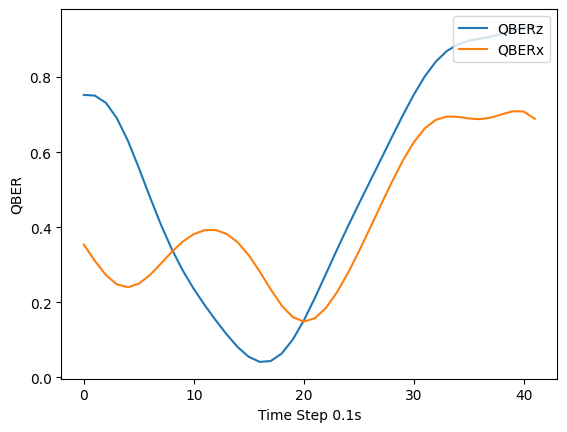

In [3]:
env.reset()

while not env.done:
    s, r, done = env.step()
    print(s)
    break

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

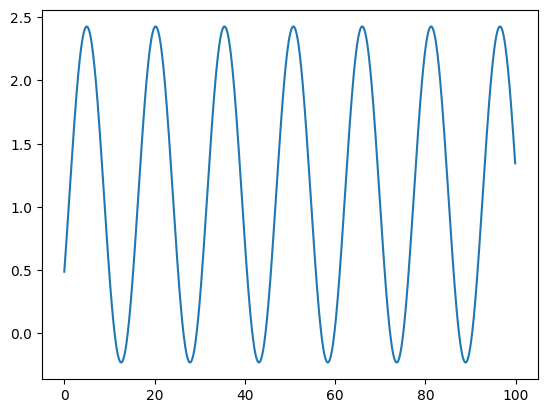

In [4]:
from environment.control import sinusoidal_control
from random import gauss

t = np.arange(0,env.max_t,env.delta_t)
_c = []
c = [np.array([gauss(0,1) for _ in range(4)])]
for i in range(len(t)):
    _c.append(sinusoidal_control(t[i], c))
plt.plot(t,_c)

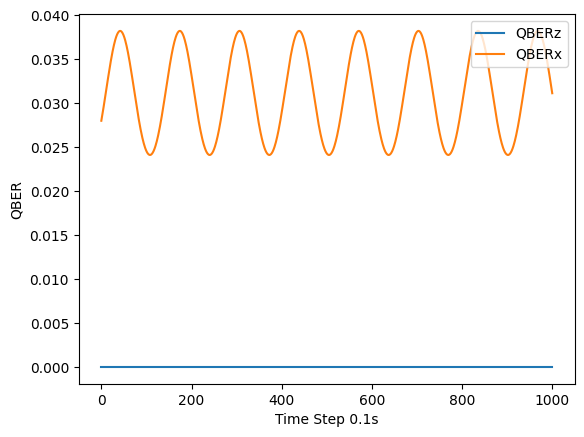

In [5]:
env.fixed_errors_flags = [True, True, True, True,
                          False, True, True, True,
                          True, True, True, True]

env.reset()

while not env.done:
    env.step()

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

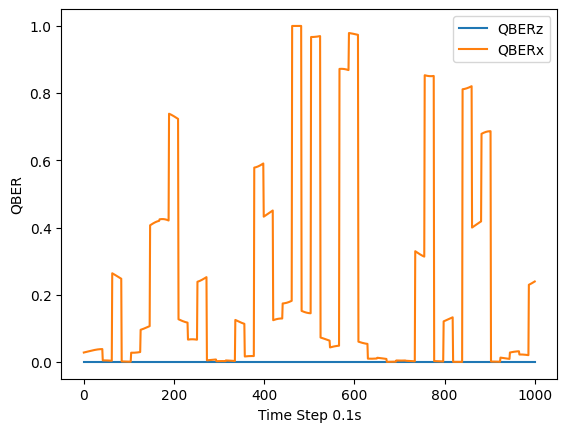

In [6]:
env.reset()

while not env.done:
    c = [gauss(0,1) for _ in range(4)]
    env.step(a_alice=[np.array(c), np.zeros(4), np.zeros(4), np.zeros(4)])

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

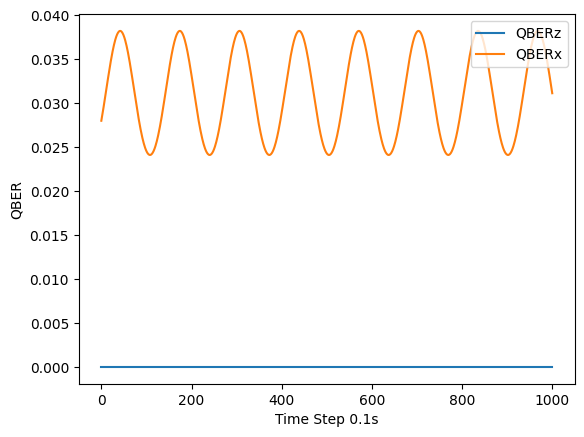

In [7]:
env.fixed_errors_flags = [True, True, True, True,
                          False, True, True, True,
                          True, True, True, True]

env.reset()

while not env.done:
    env.step()

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

200


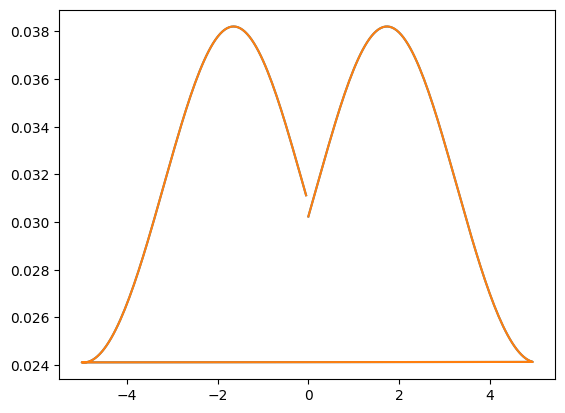

In [8]:
qbfft = np.fft.rfft(QBER[-200:])
print(len(qbfft))
freq = np.fft.fftfreq(len(QBER[-200:]), d=env.delta_t)

plt.plot(freq, np.abs(qbfft))

# Control diff

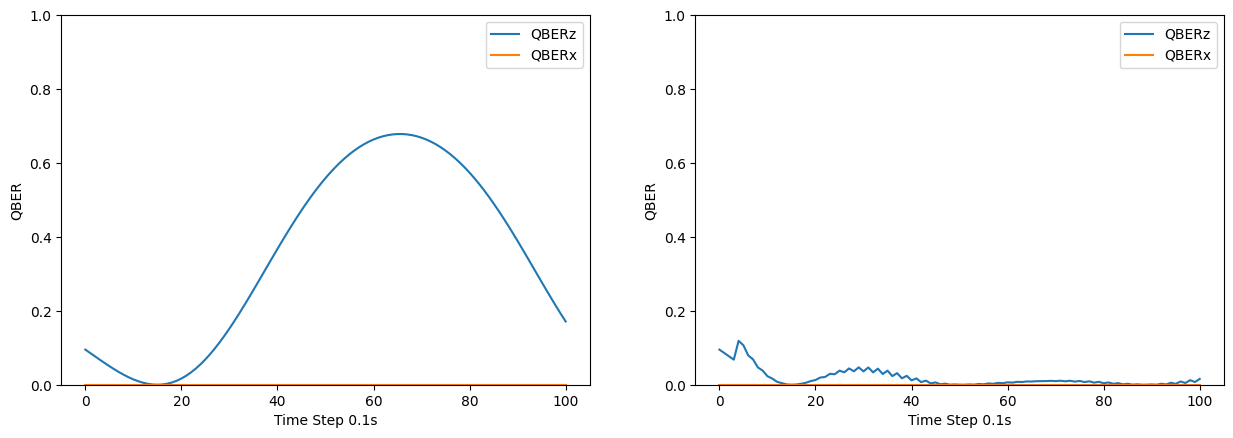

In [217]:
from environment.models import SimpleControlledFixedEnv
env = SimpleControlledFixedEnv(max_t=100, sinusoidal_components=1, noise_model='sinusoidal')
env.delta_t = 0.1
env.latency = 1
env.max_t = 10
env.setting_inverse = False
env.fixed_error_ctrl_alice = [0, np.pi, 0, 0]
env.fixed_errors_flags = [True, True, True, True,
                        True, False, True, True,
                        True, True, True, True]

env.reset()
ctrl_list = []

while not env.done:
    s, r, done = env.step()
    # print(s)
    ctrl = np.array(s)*np.pi
    ctrl_list.append(ctrl)
    # print(ctrl)

QBER = env.get_qber().copy()

env.reset()
while not env.done:
    ctr_l = ctrl_list.pop(0)[0]
    # print(ctr_l)
    s, r, done = env.step(a_alice=[0, ctr_l[0], 0, 0])
    # print(s)
    # print(ctrl)

QBER_CONTROLLED = env.get_qber().copy()

# fig
fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)

# no control
ax[0].plot(QBER[:,0],label='QBERz')
ax[0].plot(QBER[:,1],label='QBERx')
ax[0].legend(loc = 'upper right')
ax[0].set_ylabel('QBER')
ax[0].set_xlabel(f'Time Step {env.delta_t}s')

# control
ax[1].plot(QBER_CONTROLLED[:,0],label='QBERz')
ax[1].plot(QBER_CONTROLLED[:,1],label='QBERx')
ax[1].legend(loc = 'upper right')
ax[1].set_ylabel('QBER')
ax[1].set_xlabel(f'Time Step {env.delta_t}s')

plt.show()